In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
from statsmodels.graphics.gofplots import qqplot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### CARGA DOS DADOS

In [4]:
# Abrir o dataset

df_pontuacao = pd.read_csv('./pontuacao.csv')

In [5]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [6]:
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [7]:
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


## 📊 Análise Exploratória de Dados (EDA)
### 1️⃣ Estatísticas Descritivas

In [8]:
# Estatísticas básicas
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


### 2️⃣ Gráfico de Dispersão

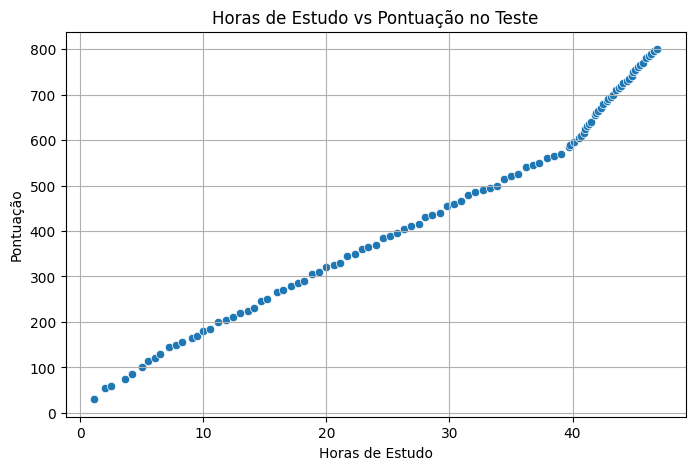

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="horas_estudo", y="pontuacao_teste", data=df_pontuacao)
plt.title("Horas de Estudo vs Pontuação no Teste")
plt.xlabel("Horas de Estudo")
plt.ylabel("Pontuação")
plt.grid(True)
plt.show()


### 3️⃣ Boxplots — Detecção de Outliers

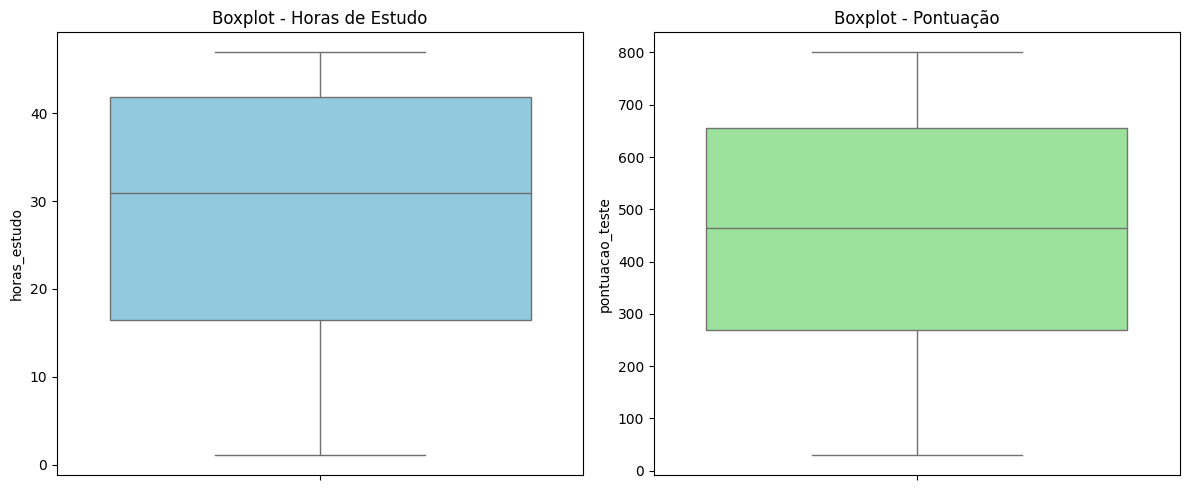

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_pontuacao["horas_estudo"], ax=ax[0], color="skyblue")
ax[0].set_title("Boxplot - Horas de Estudo")

sns.boxplot(y=df_pontuacao["pontuacao_teste"], ax=ax[1], color="lightgreen")
ax[1].set_title("Boxplot - Pontuação")

plt.tight_layout()
plt.show()


### 4️⃣ Correlação

Correlação entre horas de estudo e pontuação no teste:
                 horas_estudo  pontuacao_teste
horas_estudo         1.000000         0.992858
pontuacao_teste      0.992858         1.000000


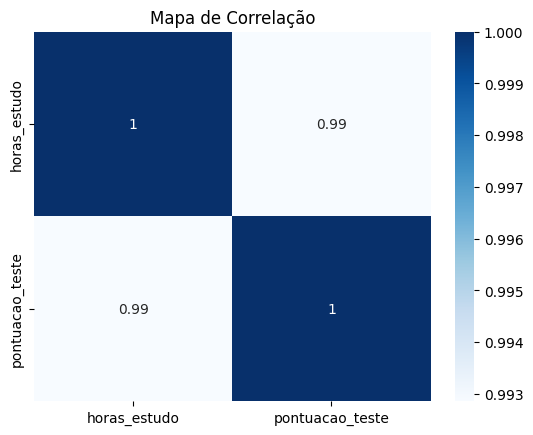

In [11]:
correlacao = df_pontuacao.corr()
print("Correlação entre horas de estudo e pontuação no teste:")
print(correlacao)

# Heatmap
sns.heatmap(correlacao, annot=True, cmap="Blues")
plt.title("Mapa de Correlação")
plt.show()


### 5️⃣ Histogramas — Distribuição das Variáveis

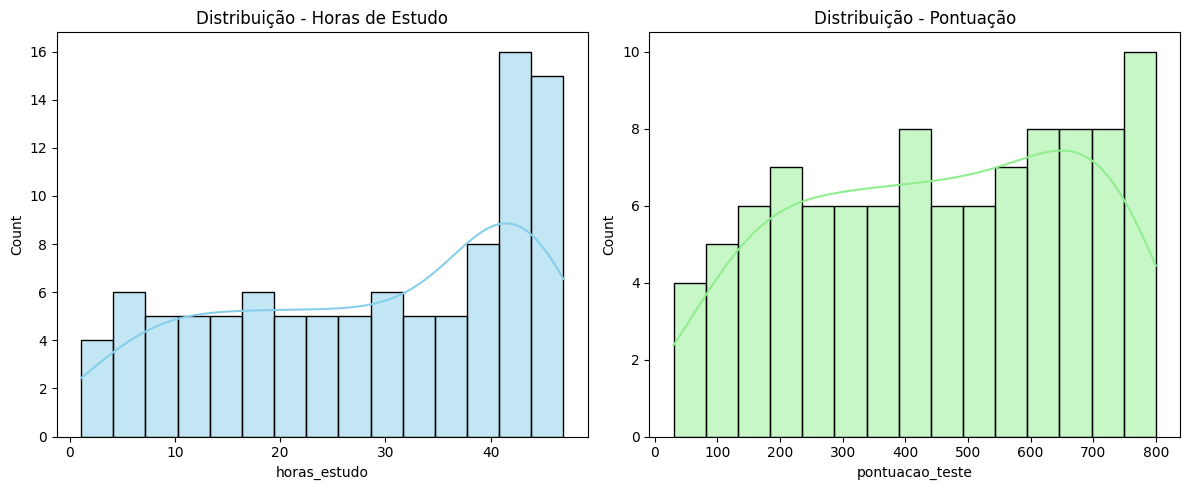

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_pontuacao["horas_estudo"], kde=True, bins=15, ax=ax[0], color="skyblue")
ax[0].set_title("Distribuição - Horas de Estudo")

sns.histplot(df_pontuacao["pontuacao_teste"], kde=True, bins=15, ax=ax[1], color="lightgreen")
ax[1].set_title("Distribuição - Pontuação")

plt.tight_layout()
plt.show()


## ⚙️ Preparação e Treinamento do Modelo

### 1️⃣ Separar variáveis X (independente) e Y (dependente)

In [ ]:
X = df_pontuacao[['horas_estudo']]  # variável independente (em formato de DataFrame)
y = df_pontuacao['pontuacao_teste']  # variável dependente
## X = df_pontuacao['horas_estudo'].values.reshape(-1, 1) caso O uso de .values.reshape(-1, 1) só é necessário quando X for um array NumPy 1D, e o sklearn espera um array 2D (coluna única).

### 2️⃣ Dividir os dados em treino e teste


In [22]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=50)


### 3️⃣ Treinar o modelo de regressão linear

In [23]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_treino, y_treino)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4️⃣ Exibir a equação da reta

In [24]:
intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]

print(f"Equação da reta: y = {intercepto:.2f} + {coeficiente:.2f} * x")


TypeError: unsupported format string passed to numpy.ndarray.__format__

# 📘 Regressão Linear Simples (Formato 2D)
Este notebook implementa regressão linear usando `X` e `y` como arrays 2D (com `.reshape(-1, 1)`), o que força o modelo a tratar o problema como multivariado (mesmo sendo univariado na prática).

## 📂 Carga dos Dados
### Lê o CSV

In [21]:

df = pd.read_csv('./pontuacao.csv')
df.head()
## ✂️ Divisão em treino e teste (2D)
# Convertendo para arrays 2D
X = df['horas_estudo'].values.reshape(-1, 1)
y = df['pontuacao_teste'].values.reshape(-1, 1)

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
## 🧠 Treinamento do Modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
## 📈 Equação da Reta
print("A equação da reta é y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

A equação da reta é y = 15.642619x + 8.476601


## ✅ Validação do Modelo — Métricas e Previsões

### 1️⃣ Fazer Previsões no Conjunto de Teste

In [25]:
y_pred = reg_model.predict(X_test)

### 2️⃣ Calcular Métricas: R², MAE, MSE

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
print(f"MSE (Erro Quadrático Médio): {mse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")


MAE (Erro Absoluto Médio): 22.96
MSE (Erro Quadrático Médio): 767.00
R² (Coeficiente de Determinação): 0.9828


### 3️⃣ Interpretação das Métricas
MAE: quanto menor, melhor — indica erro médio absoluto.

MSE: penaliza mais erros grandes, bom para controle de dispersão.

R²: varia de 0 a 1 → quanto mais próximo de 1, mais o modelo explica a variação dos dados.

### 4️⃣ (Opcional) Visualizar Previsões vs Valores Reais

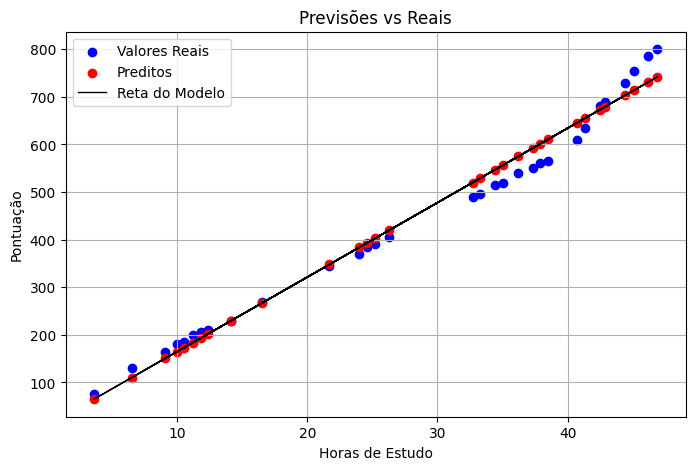

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Valores Reais")
plt.scatter(X_test, y_pred, color="red", label="Preditos")
plt.plot(X_test, y_pred, color="black", linewidth=1, label="Reta do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Pontuação")
plt.title("Previsões vs Reais")
plt.legend()
plt.grid(True)
plt.show()


## 📐 Análise de Métricas — RMSE (Root Mean Squared Error)
### 1️⃣ Calcular o RMSE

In [28]:
import numpy as np

rmse = np.sqrt(mse)
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")


RMSE (Raiz do Erro Quadrático Médio): 27.69


### 2️⃣ Interpretação
RMSE está na mesma unidade da variável alvo (pontuação).

Penaliza mais fortemente grandes erros do que o MAE.

Quanto mais próximo de 0, melhor o modelo.
### 3️⃣ Visualização: Valores Reais vs Preditos

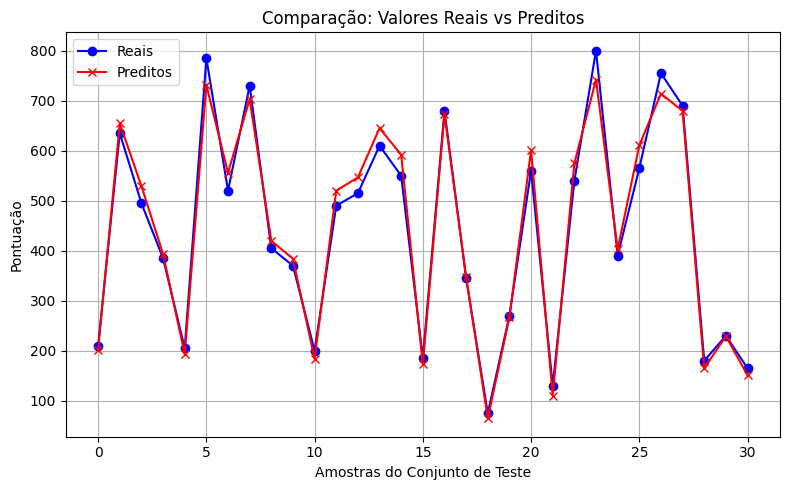

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(y_test)), y_test, marker='o', label='Reais', color='blue')
plt.plot(range(len(y_pred)), y_pred, marker='x', label='Preditos', color='red')
plt.title("Comparação: Valores Reais vs Preditos")
plt.xlabel("Amostras do Conjunto de Teste")
plt.ylabel("Pontuação")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ Resumo das Métricas (se quiser imprimir todas juntas)

In [30]:
print("----- Avaliação do Modelo -----")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.4f}")


----- Avaliação do Modelo -----
MAE : 22.96
MSE : 767.00
RMSE: 27.69
R²  : 0.9828


## 📉 Análise Gráfica e Estatística dos Resíduos
### 1️⃣ Cálculo dos Resíduos

In [31]:
residuos = y_test - y_pred

### 2️⃣ Padronização dos Resíduos

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
residuos_padronizados = scaler.fit_transform(residuos)


### 3️⃣ Gráfico de Resíduos (Predito vs Erro)

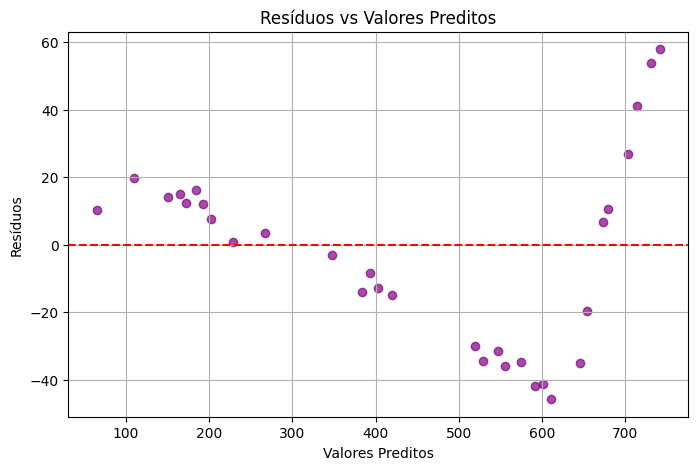

In [33]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuos, color='purple', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Valores Preditos")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.grid(True)
plt.show()


### 4️⃣ Histograma dos Resíduos

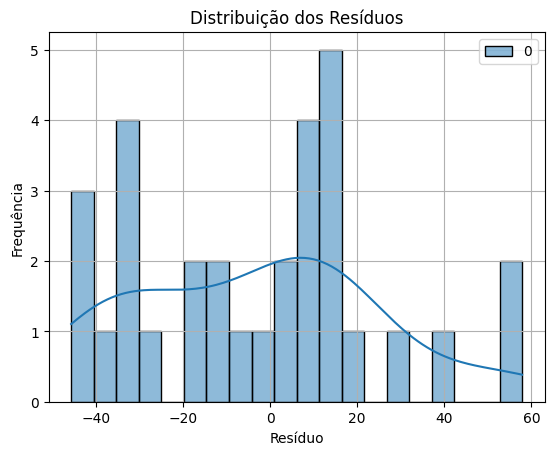

In [34]:
sns.histplot(residuos, kde=True, bins=20, color='gray')
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()


### 5️⃣ Q-Q Plot (Gráfico de Probabilidade Normal)

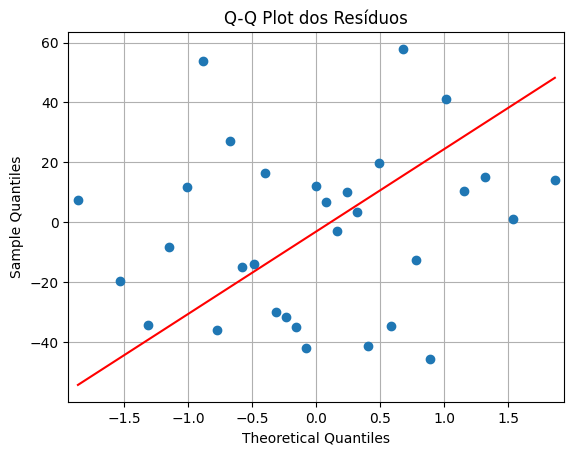

In [35]:
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

qqplot(residuos, line='s')
plt.title("Q-Q Plot dos Resíduos")
plt.grid(True)
plt.show()


### 6️⃣ Testes de Normalidade

In [36]:
from scipy.stats import shapiro, kstest

shapiro_stat, shapiro_p = shapiro(residuos)
print(f"Shapiro-Wilk: estatística={shapiro_stat:.4f}, p-valor={shapiro_p:.4f}")

kstest_stat, kstest_p = kstest(residuos.flatten(), 'norm')
print(f"Kolmogorov-Smirnov: estatística={kstest_stat:.4f}, p-valor={kstest_p:.4f}")
    

Shapiro-Wilk: estatística=0.9501, p-valor=0.1566
Kolmogorov-Smirnov: estatística=0.4836, p-valor=0.0000


📌 Interpretação dos Testes
p-valor < 0.05 → rejeita normalidade dos resíduos (má notícia para regressão linear).

p-valor >= 0.05 → resíduos seguem distribuição normal (bom sinal).

## 🧪 Testes Estatísticos de Normalidade dos Resíduos
### 1️⃣ Teste de Shapiro-Wilk

In [37]:
from scipy.stats import shapiro

stat_shapiro, p_shapiro = shapiro(residuos)
print(f"Shapiro-Wilk → estatística = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")


Shapiro-Wilk → estatística = 0.9501, p-valor = 0.1566


### 2️⃣ Teste de Kolmogorov-Smirnov

In [38]:
from scipy.stats import kstest
from sklearn.preprocessing import StandardScaler

# Resíduos precisam ser padronizados para K-S test
residuos_std = StandardScaler().fit_transform(residuos)

stat_kstest, p_kstest = kstest(residuos_std.flatten(), 'norm')
print(f"Kolmogorov-Smirnov → estatística = {stat_kstest:.4f}, p-valor = {p_kstest:.4f}")


Kolmogorov-Smirnov → estatística = 0.1265, p-valor = 0.6574


### ✅ Interpretação dos Testes

In [39]:
alpha = 0.05

print("\n🔍 Interpretação:")

if p_shapiro > alpha:
    print("✓ Shapiro-Wilk: Não rejeita H₀ — resíduos seguem distribuição normal.")
else:
    print("✗ Shapiro-Wilk: Rejeita H₀ — resíduos NÃO seguem distribuição normal.")

if p_kstest > alpha:
    print("✓ Kolmogorov-Smirnov: Não rejeita H₀ — resíduos seguem distribuição normal.")
else:
    print("✗ Kolmogorov-Smirnov: Rejeita H₀ — resíduos NÃO seguem distribuição normal.")



🔍 Interpretação:
✓ Shapiro-Wilk: Não rejeita H₀ — resíduos seguem distribuição normal.
✓ Kolmogorov-Smirnov: Não rejeita H₀ — resíduos seguem distribuição normal.


📌 Considerações Finais
Valores de p > 0.05 → modelo está consistente com pressupostos da regressão linear.

p < 0.05 → pode indicar problemas como:

Não linearidade

Variáveis faltantes

Erros sistemáticos

Outliers

## 🔮 Fazer Previsões com o Modelo
### 1️⃣ Prever a pontuação com base em horas de estudo

In [40]:
horas_novas = [[20]]  # exemplo: 20 horas de estudo
pontuacao_prevista = reg_model.predict(horas_novas)
print(f"Com 20 horas de estudo, a pontuação prevista é: {pontuacao_prevista[0][0]:.2f}")


Com 20 horas de estudo, a pontuação prevista é: 321.33


In [42]:
reg_model.predict([[30.4]])

array([[484.01220436]])

### 2️⃣ Inverter a equação da reta: quantas horas para uma pontuação alvo?

In [41]:
# y = a*x + b  → x = (y - b) / a
pontuacao_alvo = 600
a = reg_model.coef_[0][0]
b = reg_model.intercept_[0]
horas_necessarias = (pontuacao_alvo - b) / a
print(f"Para atingir {pontuacao_alvo} pontos, o aluno deve estudar aproximadamente {horas_necessarias:.2f} horas.")


Para atingir 600 pontos, o aluno deve estudar aproximadamente 37.81 horas.


### 💾 Salvar o Modelo Treinado

In [43]:
import joblib

joblib.dump(reg_model, 'modelo_regressao_linear.pkl')
print("Modelo salvo com sucesso como 'modelo_regressao_linear.pkl'")


Modelo salvo com sucesso como 'modelo_regressao_linear.pkl'
